Mounted at /content/drive
Loading dataset...
Training data shape: (1460, 81)
Test data shape: (1459, 80)

=== DATASET OVERVIEW ===
First 5 rows of training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       

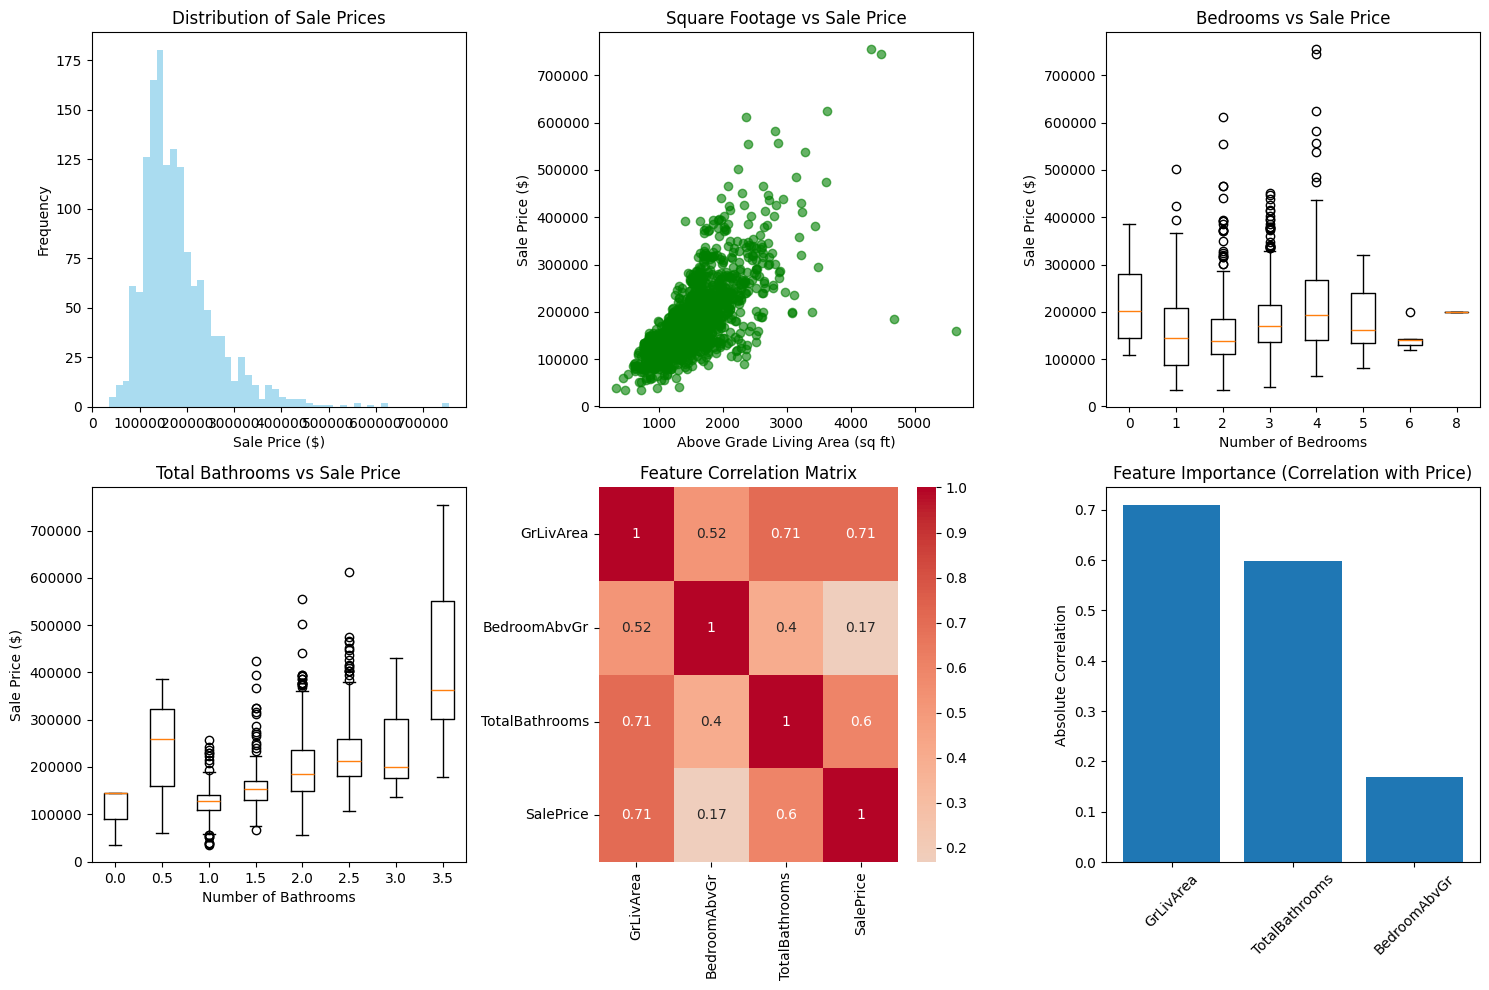


=== MODEL TRAINING ===
Training set size: 1168 samples
Test set size: 292 samples
✓ Model training completed!

=== MODEL EVALUATION ===
Training Performance:
  RMSE: $51,092.94
  MAE:  $35,269.01
  R²:   0.5623

Test Performance:
  RMSE: $53,371.56
  MAE:  $36,569.64
  R²:   0.6286

=== MODEL INSIGHTS ===
Model Coefficients:
  GrLivArea: 52,754.68
  BedroomAbvGr: -21,436.61
  TotalBathrooms: 17,063.22
Intercept: 181,441.54

Model Interpretation:
• For every additional square foot, price increases by $52,754.68
• For every additional bedroom, price changes by $-21,436.61
• For every additional bathroom, price changes by $17,063.22


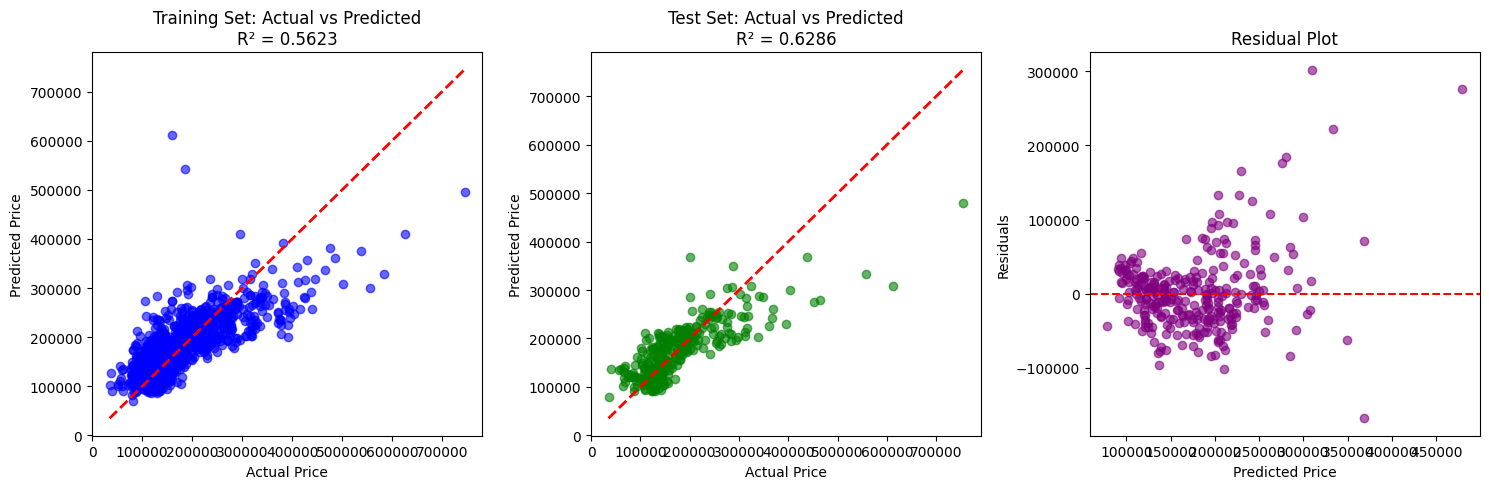


=== SAMPLE PREDICTIONS ===
Sample predictions from test set:
--------------------------------------------------------------------------------
Index    Sq Ft    Bedrooms   Bathrooms  Actual       Predicted    Error     
--------------------------------------------------------------------------------
184      1252     3          1.0        $127,000     $130,007     $3,007    
1041     1632     4          1.5        $173,000     $155,145     $17,855   
1132     2210     5          2.0        $117,500     $200,209     $82,709   
817      1689     3          2.0        $271,000     $201,068     $69,932   
720      1742     2          2.0        $275,000     $233,047     $41,953   

=== PREPARING SUBMISSION ===
✓ Submission file saved to: /content/drive/My Drive/Internship_Project/house-prices-advanced-regression-techniques/my_submission.csv

=== SUMMARY ===
Model Performance Summary:
• Test R² Score: 0.6286 (62.9% of variance explained)
• Test RMSE: $53,372
• Average prediction error: $36,

In [ ]:
# House Price Prediction using Linear Regression
# Dataset: Kaggle House Prices Advanced Regression Techniques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
train_path = '/content/drive/My Drive/Internship_Project/house-prices-advanced-regression-techniques/train.csv'
test_path = '/content/drive/My Drive/Internship_Project/house-prices-advanced-regression-techniques/test.csv'

# Read the training data
print("Loading dataset...")
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Display basic information about the dataset
print("\n=== DATASET OVERVIEW ===")
print("First 5 rows of training data:")
print(train_data.head())

print(f"\nDataset Info:")
print(f"Training samples: {len(train_data)}")
print(f"Features: {len(train_data.columns)}")
print(f"Target variable: SalePrice")

# Check for the required features
required_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
print(f"\nChecking for required features:")
for feature in required_features:
    if feature in train_data.columns:
        print(f"✓ {feature} - Available")
    else:
        print(f"✗ {feature} - Not found")

# Display target variable statistics
print(f"\n=== TARGET VARIABLE ANALYSIS ===")
print("SalePrice Statistics:")
print(train_data['SalePrice'].describe())

# Feature Engineering - Create total bathrooms feature
print(f"\n=== FEATURE ENGINEERING ===")
train_data['TotalBathrooms'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']
test_data['TotalBathrooms'] = test_data['FullBath'] + 0.5 * test_data['HalfBath']

# Select features for the model
# Using GrLivArea (square footage), BedroomAbvGr (bedrooms), and TotalBathrooms
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
X = train_data[features].copy()
y = train_data['SalePrice'].copy()

print("Selected Features:")
for i, feature in enumerate(features, 1):
    print(f"{i}. {feature}")

# Check for missing values
print(f"\n=== DATA QUALITY CHECK ===")
print("Missing values in selected features:")
print(X.isnull().sum())

# Handle missing values if any
X = X.fillna(X.median())

# Data exploration and visualization
print(f"\n=== EXPLORATORY DATA ANALYSIS ===")
print("Feature Statistics:")
print(X.describe())

# Create correlation matrix
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of target variable
plt.subplot(2, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

# Plot 2: Square footage vs Price
plt.subplot(2, 3, 2)
plt.scatter(X['GrLivArea'], y, alpha=0.6, color='green')
plt.title('Square Footage vs Sale Price')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

# Plot 3: Bedrooms vs Price
plt.subplot(2, 3, 3)
plt.boxplot([y[X['BedroomAbvGr'] == i] for i in sorted(X['BedroomAbvGr'].unique())])
plt.title('Bedrooms vs Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($)')
plt.xticks(range(1, len(X['BedroomAbvGr'].unique()) + 1), sorted(X['BedroomAbvGr'].unique()))

# Plot 4: Bathrooms vs Price
plt.subplot(2, 3, 4)
bathroom_values = sorted(X['TotalBathrooms'].unique())
plt.boxplot([y[X['TotalBathrooms'] == i] for i in bathroom_values])
plt.title('Total Bathrooms vs Sale Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price ($)')
plt.xticks(range(1, len(bathroom_values) + 1), bathroom_values)

# Plot 5: Correlation heatmap
plt.subplot(2, 3, 5)
correlation_data = pd.concat([X, y], axis=1)
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Plot 6: Feature relationships
plt.subplot(2, 3, 6)
feature_importance = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)[1:]
plt.bar(range(len(feature_importance)), feature_importance.values)
plt.title('Feature Importance (Correlation with Price)')
plt.xticks(range(len(feature_importance)), feature_importance.index, rotation=45)
plt.ylabel('Absolute Correlation')

plt.tight_layout()
plt.show()

# Split the data
print(f"\n=== MODEL TRAINING ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Feature scaling (optional but recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✓ Model training completed!")

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Model evaluation
print(f"\n=== MODEL EVALUATION ===")
print("Training Performance:")
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"  RMSE: ${train_rmse:,.2f}")
print(f"  MAE:  ${train_mae:,.2f}")
print(f"  R²:   {train_r2:.4f}")

print("\nTest Performance:")
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAE:  ${test_mae:,.2f}")
print(f"  R²:   {test_r2:.4f}")

# Model coefficients
print(f"\n=== MODEL INSIGHTS ===")
print("Model Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:,.2f}")
print(f"Intercept: {model.intercept_:,.2f}")

# Interpretation
print(f"\nModel Interpretation:")
print(f"• For every additional square foot, price increases by ${model.coef_[0]:,.2f}")
print(f"• For every additional bedroom, price changes by ${model.coef_[1]:,.2f}")
print(f"• For every additional bathroom, price changes by ${model.coef_[2]:,.2f}")

# Visualization of results
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted (Training)
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Plot 2: Actual vs Predicted (Test)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')

# Plot 3: Residuals
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Sample predictions
print(f"\n=== SAMPLE PREDICTIONS ===")
sample_indices = np.random.choice(X_test.index, 5, replace=False)
print("Sample predictions from test set:")
print("-" * 80)
print(f"{'Index':<8} {'Sq Ft':<8} {'Bedrooms':<10} {'Bathrooms':<10} {'Actual':<12} {'Predicted':<12} {'Error':<10}")
print("-" * 80)

for idx in sample_indices:
    actual = y_test.loc[idx]
    sample_features = X_test.loc[[idx]]
    sample_scaled = scaler.transform(sample_features)
    predicted = model.predict(sample_scaled)[0]
    error = abs(actual - predicted)

    print(f"{idx:<8} {sample_features['GrLivArea'].iloc[0]:<8.0f} "
          f"{sample_features['BedroomAbvGr'].iloc[0]:<10.0f} "
          f"{sample_features['TotalBathrooms'].iloc[0]:<10.1f} "
          f"${actual:<11,.0f} ${predicted:<11,.0f} ${error:<9,.0f}")

# Prepare predictions for test dataset (for submission)
print(f"\n=== PREPARING SUBMISSION ===")
test_features = test_data[features].copy()
test_features = test_features.fillna(test_features.median())
test_features_scaled = scaler.transform(test_features)
test_predictions = model.predict(test_features_scaled)

# Create submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

submission_path = '/content/drive/My Drive/Internship_Project/house-prices-advanced-regression-techniques/my_submission.csv'
submission.to_csv(submission_path, index=False)
print(f"✓ Submission file saved to: {submission_path}")

print(f"\n=== SUMMARY ===")
print(f"Model Performance Summary:")
print(f"• Test R² Score: {test_r2:.4f} ({test_r2*100:.1f}% of variance explained)")
print(f"• Test RMSE: ${test_rmse:,.0f}")
print(f"• Average prediction error: ${test_mae:,.0f}")
print(f"• Number of features used: {len(features)}")
print(f"• Training samples: {len(X_train)}")
print(f"• Test predictions generated: {len(test_predictions)}")

# Model equation
print(f"\nLinear Regression Equation:")
equation = f"Price = {model.intercept_:,.0f}"
for i, (feature, coef) in enumerate(zip(features, model.coef_)):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:,.0f} × {feature}"
print(equation)

print(f"\n🎉 Analysis Complete! Check the visualizations and submission file.")